In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from h_test_IQM.pipeline import get_scores
from h_test_IQM.pipeline.main import plot_hist, samples_to_pdf
from tqdm import tqdm

In [2]:
dataset1 = 'CIFAR_10'
data1_labels = 'all'
dataset_proportion1 = 0.1
name1 = 'CIFAR all'

dataset2 = 'CIFAR_10'
data2_labels = [0]
dataset_proportion2 = 0.1
name2 = 'CIFAR one'

noise = 'gaussian_noise'
test = 'KL'
dev = True
runs = 10

In [3]:
test1 = []
for i in tqdm(range(runs)):
    _, _, res = get_scores(
        dataset_target=dataset1,
        dataset_test=dataset1,
        test_labels=data1_labels,
        transform_test=noise,
        scorer='entropy-2-mse',
        test=test,
        dev=dev,
        dataset_proportion=dataset_proportion1,
        seed=i,
        _print=False
    )
    test1.append(res[test])

 40%|████      | 4/10 [00:30<00:46,  7.71s/it]


KeyboardInterrupt: 

In [14]:
test2 = []
for i in tqdm(range(runs)):
    _, _, res = get_scores(
        dataset_target=dataset2,
        dataset_test=dataset2,
        test_labels=data2_labels,
        transform_test=noise,
        scorer='entropy-2-mse',
        test=test,
        dev=dev,
        dataset_proportion=dataset_proportion2,
        seed=i,
        _print=False
    )
    test2.append(res[test])

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


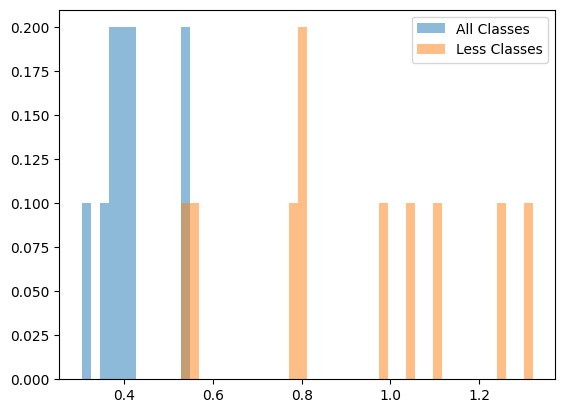

In [15]:
test1 = np.array(test1)
test2 = np.array(test2)
dist1, dist2, all_bins, one_bins = samples_to_pdf(
    test2, test1, num_bins=50)
plot_hist(dist1, all_bins, name=name1)
plot_hist(dist2, one_bins, name=name2)
plt.legend()
plt.show()